In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

## Summary of Important information for Thailand from https://data.worldbank.org/country/MY 
* Data is in first page of excel sheet, metadata in last page

In [22]:
# import data 
df = pd.read_excel('../data/Malaysia/WorldBankMalaysia.xls', sheet_name = 0, skiprows=3)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Malaysia,MYS,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Malaysia,MYS,"Internally displaced persons, new displacement...",VC.IDP.NWCV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Malaysia,MYS,"Voice and Accountability: Percentile Rank, Low...",VA.PER.RNK.LOWER,NaN,NaN,NaN,NaN,NaN,NaN,...,3.004926e+01,2.857143e+01,2.955665e+01,3.054187e+01,3.640777e+01,3.719807e+01,3.526570e+01,3.478261e+01,3.913044e+01,NaN
3,Malaysia,MYS,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.384502e+01,5.070468e+01,5.092644e+01,4.965984e+01,4.883242e+01,4.835889e+01,1.354862e+01,3.670424e-01,2.004541e+01,3.488865e+01
4,Malaysia,MYS,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,4.197181e+10,3.484190e+10,3.551266e+10,3.702239e+10,4.015379e+10,4.100278e+10,2.207634e+10,2.116922e+10,3.186148e+10,4.259397e+10


In [23]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

## Tidy and Cleaning Data


In [24]:
# Change from wide to long
df_tidy = df.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name = 'Year',
                    value_name = 'cases')
df_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,cases
0,Malaysia,MYS,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,1960,NaN
1,Malaysia,MYS,"Internally displaced persons, new displacement...",VC.IDP.NWCV,1960,NaN
2,Malaysia,MYS,"Voice and Accountability: Percentile Rank, Low...",VA.PER.RNK.LOWER,1960,NaN
3,Malaysia,MYS,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,1960,NaN
4,Malaysia,MYS,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,1960,NaN


In [25]:
# get rid of missing values
df_tidy.isna().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
Year                  0
cases             51998
dtype: int64

In [26]:
df_tidy.dropna(subset=['cases'], inplace=True)
df_tidy.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Year              0
cases             0
dtype: int64

In [27]:
# use pivot table to turn all indicators into column (so it is easier to search value for)
df.drop('Indicator Code', axis='columns', inplace=True)
df_tidy_pivot = df_tidy.pivot_table(index = ['Country Name', 'Country Code', 'Year'],
                                    columns = 'Indicator Name',
                                    values = 'cases')
df_tidy_pivot = df_tidy_pivot.reset_index()
df_tidy_pivot.columns.name = None
df_tidy_pivot.head()

,Country Name,Country Code,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",...,"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Women Business and the Law Index Score (scale 1-100),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Malaysia,MYS,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Malaysia,MYS,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Malaysia,MYS,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Malaysia,MYS,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Malaysia,MYS,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# save tidy table as csv
df_tidy_pivot.to_csv('../data/Malaysia/TidyMalaysiaWorldBank.csv')

## Data Analysis
* This table also has the indicator: Total greenhouse gas emissions (kt of CO2 equivalent), so I can convert this to a per capita value by dividing by population

### Total GHG emission per capita

In [29]:
# obtain population data
df_population = pd.read_csv('../data/TidyPopulationWorldBank.csv')
df_population.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54608.0
1,Africa Eastern and Southern,AFE,1960,130692579.0
2,Afghanistan,AFG,1960,8622466.0
3,Africa Western and Central,AFW,1960,97256290.0
4,Angola,AGO,1960,5357195.0


In [32]:
df_tidy_pivot.dtypes # must convert Year to int

Country Name                                                                                         object
Country Code                                                                                         object
Year                                                                                                 object
ARI treatment (% of children under 5 taken to a health provider)                                    float64
Access to clean fuels and technologies for cooking (% of population)                                float64
                                                                                                     ...   
Wage and salaried workers, total (% of total employment) (modeled ILO estimate)                     float64
Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)    float64
Women Business and the Law Index Score (scale 1-100)                                                float64
Women's share of population 

In [34]:
df_tidy_pivot['Year'] = df_tidy_pivot['Year'].astype('int')
df_tidy_pivot.dtypes

Country Name                                                                                         object
Country Code                                                                                         object
Year                                                                                                  int64
ARI treatment (% of children under 5 taken to a health provider)                                    float64
Access to clean fuels and technologies for cooking (% of population)                                float64
                                                                                                     ...   
Wage and salaried workers, total (% of total employment) (modeled ILO estimate)                     float64
Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)    float64
Women Business and the Law Index Score (scale 1-100)                                                float64
Women's share of population 

In [40]:
# merge the data so that we can obtain the population to calculate total ghg emission per capita
df_merged = df_tidy_pivot.merge(df_population, how = 'left', on = ['Country Name', 'Country Code', 'Year'])
df_merged[['Population', 'Year']]

,Population,Year
0,7833782.0,1960
1,8074805.0,1961
2,8324218.0,1962
3,8579350.0,1963
4,8835925.0,1964
...,...,...
59,32804020.0,2019
60,33199993.0,2020
61,33573874.0,2021
62,33938221.0,2022


In [47]:
# check whether number matches
df_population.query("`Country Name` == 'Malaysia' ")[['Population', 'Year']] #yess it matches


,Population,Year
168,7833782.0,1960
432,8074805.0,1961
696,8324218.0,1962
960,8579350.0,1963
1224,8835925.0,1964
...,...,...
15773,32804020.0,2019
16038,33199993.0,2020
16303,33573874.0,2021
16568,33938221.0,2022


In [48]:
# add the columns for GHG Emission per capita
# make a new column for Total GHG emissions per capita (kt of CO2 equivalent per capita)
df_merged['Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)'] = df_merged['Total greenhouse gas emissions (kt of CO2 equivalent)'] * 1000/df_merged['Population']
# df_merged[['Year', 'Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)']].head(50)
df_merged.to_csv('../data/Malaysia/TidyMalaysialandWorldBank.csv', index=False)

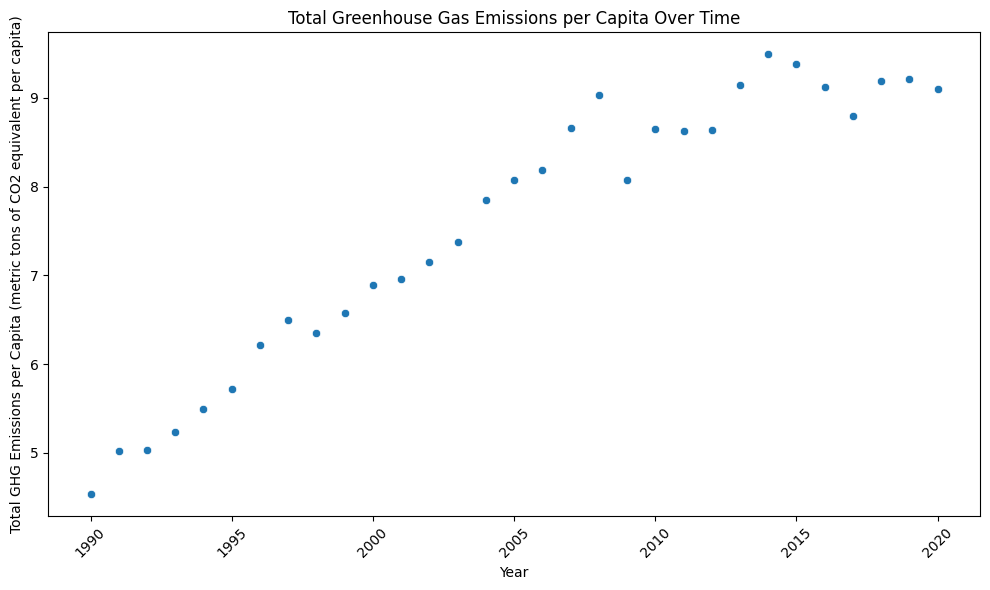

In [49]:
# Visualise this data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Year', y='Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)')
# Rotate x-axis tick labels for readability
plt.xticks(rotation=45)

plt.title('Total Greenhouse Gas Emissions per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)')
plt.tight_layout()
plt.show()